In [1]:
## import necessary modules
import glob 
import pandas as pd
from pprint import pprint
import os

In [2]:
## define years and quarters for processing data
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
quarters = [1,2,3,4]

## create a list of drugs of interest
## you need to modify this list as necessary
## the current drugs are for ADHD
## You can collect the list of drugs from an online website such as Drugs.com
adhd_drugs = ['albuterol', 'levalbuterol', 'terbutaline', 'pirbuterol', 'metaproterenol', 'formoterol', 'salmeterol', 'arformoterol', 'ipratropium', 'tiotropium', 'theophylline', 'montelukast', 'zafirlukast', 'nedocromil', 'cromolyn', 'beclomethasone', 'budesonide', 'fluticasone', 'mometasone', 'triamcinolone', 'prednisone', 'methylprednisolone', 'prednisolone', 'hydrocortisone', 'dexamethasone', 'omalizumab']

In [3]:
for year in years:
    for q in quarters:    
        ## get the file names with the designated patterns
        files = glob.glob('Data1/*' + str(year) +'*' + str(q) + '/ascii/*' + str(q) + '.txt',  
                           recursive = True) 
        for file in files: 
            print(file)
            ## read files according to their names
            if "demo" in file.lower():
                demo = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False) 
            elif "drug" in file.lower():
                drug = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False)
            elif "indi" in file.lower():
                indi = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "outc" in file.lower():
                outc = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "reac" in file.lower():
                reac = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False )
            elif "rpsr" in file.lower():
                rpsr = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False ) 
            elif "ther" in file.lower():
                ther = pd.read_csv(file, sep = "$", header = 0,encoding='latin1', low_memory=False )
        ## create a mask for the data associated with ADHD
        ## delete the next statement if you want to have the entire data
        ## check "list comprehension", a new Python syntax, at the following site: 
        ## https://www.w3schools.com/python/python_lists_comprehension.asp
        mask_for_adhd = [str(med).lower() in adhd_drugs for med in drug["drugname"]]
        ## apply the mask to the columns and overwrite the drug table
        drug = drug[mask_for_adhd]
        ## join tables
        inner_join = pd.merge(left= demo, right = drug, how = "inner", 
                      left_on = "primaryid", right_on = "primaryid")
        ## change duplicate column names and remove one of them
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        inner_join = pd.merge(left= inner_join, right = indi, how = "inner", 
                      left_on = ["primaryid", "drug_seq"], right_on = ["primaryid", "indi_drug_seq"] )
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        inner_join = inner_join.drop(labels= ["indi_drug_seq"], axis= 1)
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        inner_join = pd.merge(left= inner_join, right = reac, how = "inner", 
                      left_on = "primaryid", right_on = "primaryid")
        # drop the duplicate abbreviation column
        inner_join = inner_join.drop(labels= ["caseid_y"], axis= 1)
        # change column name
        inner_join.rename(columns={'caseid_x': 'caseid'}, inplace=True)
        ## save the joined tables as csv files in the designated directories
        path = 'Result/' + str(year)+'/Quarterly'
        if not os.path.exists(path):
            os.makedirs(path)
        inner_join.to_csv(path + '/' + str(year) + '_' + str(q) + '.csv')

Data1/faers_ascii_2013q1/ascii/DEMO13Q1.txt
Data1/faers_ascii_2013q1/ascii/DRUG13Q1.txt
Data1/faers_ascii_2013q1/ascii/INDI13Q1.txt
Data1/faers_ascii_2013q1/ascii/OUTC13Q1.txt
Data1/faers_ascii_2013q1/ascii/REAC13Q1.txt
Data1/faers_ascii_2013q1/ascii/RPSR13Q1.txt
Data1/faers_ascii_2013q1/ascii/THER13Q1.txt
Data1/faers_ascii_2013q2/ascii/DEMO13Q2.txt
Data1/faers_ascii_2013q2/ascii/DRUG13Q2.txt
Data1/faers_ascii_2013q2/ascii/INDI13Q2.txt
Data1/faers_ascii_2013q2/ascii/OUTC13Q2.txt
Data1/faers_ascii_2013q2/ascii/REAC13Q2.txt
Data1/faers_ascii_2013q2/ascii/RPSR13Q2.txt
Data1/faers_ascii_2013q2/ascii/THER13Q2.txt
Data1/faers_ascii_2013q3/ascii/DEMO13Q3.txt
Data1/faers_ascii_2013q3/ascii/DRUG13Q3.txt
Data1/faers_ascii_2013q3/ascii/INDI13Q3.txt
Data1/faers_ascii_2013q3/ascii/OUTC13Q3.txt
Data1/faers_ascii_2013q3/ascii/REAC13Q3.txt
Data1/faers_ascii_2013q3/ascii/RPSR13Q3.txt
Data1/faers_ascii_2013q3/ascii/THER13Q3.txt
Data1/faers_ascii_2013q4/ascii/DEMO13Q4.txt
Data1/faers_ascii_2013q4/ascii/D

In [4]:
## open CSV files
for year in years:
    files = glob.glob('Result/' + str(year) + '/Quarterly/' + str(year) + '*.csv', \
                           recursive = True)
    ## create an empty data frame for yearly data
    n_df = pd.DataFrame()
    ## read quarterly files
    for file in files:
        print(file)
        df = pd.read_csv(file, low_memory=False)
        ## concatenate each quartely files to "n_df" dataframe
        n_df = pd.concat([n_df,df],axis=0) 
    n_df.reset_index(inplace=True)
    ## "index" row is added, so we drop this
    n_df.drop(['index'], axis=1, inplace=True) 
    path1 = 'Result/' + str(year) + '/Yearly'
    if not os.path.exists(path1):
        os.makedirs(path1)  
    ## save the joined tables as csv files in the designated directories
    n_df.to_csv(path1 + '/' + str(year) + '_Yearly.csv', index=False)

Result/2013/Quarterly/2013_1.csv
Result/2013/Quarterly/2013_2.csv
Result/2013/Quarterly/2013_3.csv
Result/2013/Quarterly/2013_4.csv
Result/2014/Quarterly/2014_1.csv
Result/2014/Quarterly/2014_2.csv
Result/2014/Quarterly/2014_3.csv
Result/2014/Quarterly/2014_4.csv
Result/2015/Quarterly/2015_1.csv
Result/2015/Quarterly/2015_2.csv
Result/2015/Quarterly/2015_3.csv
Result/2015/Quarterly/2015_4.csv
Result/2016/Quarterly/2016_1.csv
Result/2016/Quarterly/2016_2.csv
Result/2016/Quarterly/2016_3.csv
Result/2016/Quarterly/2016_4.csv
Result/2017/Quarterly/2017_1.csv
Result/2017/Quarterly/2017_2.csv
Result/2017/Quarterly/2017_3.csv
Result/2017/Quarterly/2017_4.csv
Result/2018/Quarterly/2018_1.csv
Result/2018/Quarterly/2018_2.csv
Result/2018/Quarterly/2018_3.csv
Result/2018/Quarterly/2018_4.csv
Result/2019/Quarterly/2019_1.csv
Result/2019/Quarterly/2019_2.csv
Result/2019/Quarterly/2019_3.csv
Result/2019/Quarterly/2019_4.csv
Result/2020/Quarterly/2020_1.csv
Result/2020/Quarterly/2020_2.csv
Result/202

In [5]:
## create an empty data frame for all data
new_df = pd.DataFrame()
## read yearly files
for year in years:
    files = glob.glob('Result/' + str(year) + '/Yearly/' + str(year) + '*.csv',  
                           recursive = True)
    df = pd.read_csv(files[0],low_memory=False)
    ## concatenate each quartely files to "n_df" dataframe
    new_df = pd.concat([new_df,df],axis=0)
    
new_df.reset_index(inplace=True)
## "index" row is added, so we drop this
new_df.drop(['index'], axis=1, inplace=True)
new_df = new_df.drop(labels= ["Unnamed: 0"], axis= 1)
path2 = 'Result/Final'

if not os.path.exists(path2):
    os.makedirs(path2)
## Save the final data
new_df.to_csv('Result/Final/allyrs_top25drugs.csv', index=False)

In [6]:
count = new_df.shape[0]
print(count)


407579


In [7]:
print(new_df)

        primaryid   caseid  caseversion i_f_code    event_dt      mfr_dt  \
0        42120942  4212094            2        F    200408.0  20130314.0   
1        42120942  4212094            2        F    200408.0  20130314.0   
2        42120942  4212094            2        F    200408.0  20130314.0   
3        42120942  4212094            2        F    200408.0  20130314.0   
4        57419732  5741973            2        F  20041114.0  20130314.0   
...           ...      ...          ...      ...         ...         ...   
407574   93975646  9397564            6        F         NaN  20201209.0   
407575   93975646  9397564            6        F         NaN  20201209.0   
407576   93975646  9397564            6        F         NaN  20201209.0   
407577   93975646  9397564            6        F         NaN  20201209.0   
407578   93975646  9397564            6        F         NaN  20201209.0   

        init_fda_dt    fda_dt rept_cod                         mfr_num  ...  \
0       

In [8]:
# Find all rows where "Asthma" (or variations of this word) appears in indi_pt or pt columns
asthma_rows = new_df[new_df['indi_pt'].str.contains('Asthma|asthma|ASTHMA') | new_df['pt'].str.contains('Asthma|asthma|ASTHMA')]

# Print the resulting DataFrame
print(asthma_rows)

        primaryid    caseid  caseversion i_f_code    event_dt      mfr_dt  \
93       62263022   6226302            2        F  20060705.0  20130313.0   
94       62263022   6226302            2        F  20060705.0  20130313.0   
95       62263022   6226302            2        F  20060705.0  20130313.0   
96       62263022   6226302            2        F  20060705.0  20130313.0   
98       63126712   6312671            2        F    200502.0  20130218.0   
...           ...       ...          ...      ...         ...         ...   
407545  186900751  18690075            1        I         NaN  20201221.0   
407546  186900751  18690075            1        I         NaN  20201221.0   
407547  186900751  18690075            1        I         NaN  20201221.0   
407548   67159813   6715981            3        F  20070930.0  20081228.0   
407549   67159813   6715981            3        F  20070930.0  20081228.0   

        init_fda_dt    fda_dt rept_cod                  mfr_num  ...  \
93 

In [9]:
print(new_df.columns)


Index(['primaryid', 'caseid', 'caseversion', 'i_f_code', 'event_dt', 'mfr_dt',
       'init_fda_dt', 'fda_dt', 'rept_cod', 'mfr_num', 'mfr_sndr', 'age',
       'age_cod', 'gndr_cod', 'e_sub', 'wt', 'wt_cod', 'rept_dt', 'to_mfr',
       'occp_cod', 'reporter_country', 'occr_country', 'drug_seq', 'role_cod',
       'drugname', 'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr',
       'cum_dose_unit', 'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num',
       'dose_amt', 'dose_unit', 'dose_form', 'dose_freq', 'indi_pt', 'pt',
       'auth_num', 'lit_ref', 'age_grp', 'sex', 'prod_ai', 'drug_rec_act'],
      dtype='object')


In [10]:
drug['drugname'].value_counts()


MONTELUKAST       2012
TRIAMCINOLONE      625
IPRATROPIUM        412
MOMETASONE         252
TIOTROPIUM         194
THEOPHYLLINE       183
Triamcinolone       96
FORMOTEROL          86
TERBUTALINE         57
Ipratropium         39
SALMETEROL          38
Theophylline        38
BECLOMETHASONE      34
Mometasone          31
Tiotropium          22
Formoterol          15
ipratropium         15
Salmeterol          13
ARFORMOTEROL         6
beclomethasone       4
tiotropium           4
triamcinolone        4
Terbutaline          4
CROMOLYN             3
formoterol           3
terbutaline          2
theophylline         2
Beclomethasone       2
Cromolyn             2
METAPROTERENOL       1
arformoterol         1
mometasone           1
Name: drugname, dtype: int64

In [11]:
import pandas as pd
pd.set_option('display.max_rows', 100)


In [12]:
drug['drugname'].value_counts().head(100)



MONTELUKAST       2012
TRIAMCINOLONE      625
IPRATROPIUM        412
MOMETASONE         252
TIOTROPIUM         194
THEOPHYLLINE       183
Triamcinolone       96
FORMOTEROL          86
TERBUTALINE         57
Ipratropium         39
SALMETEROL          38
Theophylline        38
BECLOMETHASONE      34
Mometasone          31
Tiotropium          22
Formoterol          15
ipratropium         15
Salmeterol          13
ARFORMOTEROL         6
beclomethasone       4
tiotropium           4
triamcinolone        4
Terbutaline          4
CROMOLYN             3
formoterol           3
terbutaline          2
theophylline         2
Beclomethasone       2
Cromolyn             2
METAPROTERENOL       1
arformoterol         1
mometasone           1
Name: drugname, dtype: int64

In [13]:
## Just to examine attributes' of duplicated instances
duplicateRowsDF = new_df[new_df.duplicated(["primaryid","caseid","drugname","pt"], keep = False)]

In [14]:
new_df.drop_duplicates(subset=["primaryid","caseid","drugname","pt"], keep = "first", inplace = True)

In [15]:
new_df.shape

(379661, 47)

In [16]:
age_mask = (new_df["age"] >= 18) & (new_df["age"] <= 65) 
age_mask.value_counts()

False    212667
True     166994
Name: age, dtype: int64

In [17]:
new_df = new_df[age_mask]
new_df.shape

(166994, 47)

In [18]:
print(new_df)

        primaryid    caseid  caseversion i_f_code    event_dt      mfr_dt  \
6        58123843   5812384            3        F  20020818.0  20130314.0   
7        58123843   5812384            3        F  20020818.0  20130314.0   
8        58123843   5812384            3        F  20020818.0  20130314.0   
9        58123843   5812384            3        F  20020818.0  20130314.0   
10       58123843   5812384            3        F  20020818.0  20130314.0   
...           ...       ...          ...      ...         ...         ...   
407545  186900751  18690075            1        I         NaN  20201221.0   
407546  186900751  18690075            1        I         NaN  20201221.0   
407547  186900751  18690075            1        I         NaN  20201221.0   
407548   67159813   6715981            3        F  20070930.0  20081228.0   
407549   67159813   6715981            3        F  20070930.0  20081228.0   

        init_fda_dt    fda_dt rept_cod                  mfr_num  ...  \
6  

In [19]:
new_df.head(20)

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,mfr_num,...,dose_form,dose_freq,indi_pt,pt,auth_num,lit_ref,age_grp,sex,prod_ai,drug_rec_act
6,58123843,5812384,3,F,20020818.0,20130314.0,20050606,20130322,PER,GB-JNJFOC-20050507279,...,UNKNOWN,NaN,Product used for unknown indication,Abnormal dreams,NaN,NaN,NaN,NaN,NaN,NaN
7,58123843,5812384,3,F,20020818.0,20130314.0,20050606,20130322,PER,GB-JNJFOC-20050507279,...,UNKNOWN,NaN,Product used for unknown indication,Aggression,NaN,NaN,NaN,NaN,NaN,NaN
8,58123843,5812384,3,F,20020818.0,20130314.0,20050606,20130322,PER,GB-JNJFOC-20050507279,...,UNKNOWN,NaN,Product used for unknown indication,Anxiety,NaN,NaN,NaN,NaN,NaN,NaN
9,58123843,5812384,3,F,20020818.0,20130314.0,20050606,20130322,PER,GB-JNJFOC-20050507279,...,UNKNOWN,NaN,Product used for unknown indication,Disturbance in attention,NaN,NaN,NaN,NaN,NaN,NaN
10,58123843,5812384,3,F,20020818.0,20130314.0,20050606,20130322,PER,GB-JNJFOC-20050507279,...,UNKNOWN,NaN,Product used for unknown indication,Drug withdrawal syndrome,NaN,NaN,NaN,NaN,NaN,NaN
11,58123843,5812384,3,F,20020818.0,20130314.0,20050606,20130322,PER,GB-JNJFOC-20050507279,...,UNKNOWN,NaN,Product used for unknown indication,Emotional disorder,NaN,NaN,NaN,NaN,NaN,NaN
12,58123843,5812384,3,F,20020818.0,20130314.0,20050606,20130322,PER,GB-JNJFOC-20050507279,...,UNKNOWN,NaN,Product used for unknown indication,Irritability,NaN,NaN,NaN,NaN,NaN,NaN
13,58123843,5812384,3,F,20020818.0,20130314.0,20050606,20130322,PER,GB-JNJFOC-20050507279,...,UNKNOWN,NaN,Product used for unknown indication,Nightmare,NaN,NaN,NaN,NaN,NaN,NaN
14,58123843,5812384,3,F,20020818.0,20130314.0,20050606,20130322,PER,GB-JNJFOC-20050507279,...,UNKNOWN,NaN,Product used for unknown indication,Overdose,NaN,NaN,NaN,NaN,NaN,NaN
15,58123843,5812384,3,F,20020818.0,20130314.0,20050606,20130322,PER,GB-JNJFOC-20050507279,...,UNKNOWN,NaN,Product used for unknown indication,Suicide attempt,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
new_df.to_csv('Result/Final/allyrs_top25drugs_age_18_65.csv', index=False)

In [21]:
baskets = []

# Group the data by patient ID
grouped = new_df.groupby('caseid')

for patient_id, group in grouped:
    # Create a basket for the patient
    basket = [group.iloc[0]['drugname'], group.iloc[0]['pt']]
    # Add the drug and adverse reaction to the basket
    basket += group['pt'].tolist()[1:]
    basket += group['drugname'].tolist()[1:]
    # Add the basket to the list
    baskets.append(basket)


In [22]:
len(baskets)

28809

In [23]:
baskets[1]

['HYDROCORTISONE',
 'Abdominal distension',
 'Abdominal pain upper',
 'Abscess jaw',
 'Actinomycosis',
 'Adrenal insufficiency',
 'Amnesia',
 'Anaemia of chronic disease',
 'Anhedonia',
 'Anxiety',
 'Arteriosclerosis coronary artery',
 'Arthralgia',
 'Arthropathy',
 'Balanoposthitis',
 'Basal cell carcinoma',
 'Benign oesophageal neoplasm',
 'Bladder diverticulum',
 'Blood testosterone decreased',
 'Bone erosion',
 'Bone lesion',
 'Bone swelling',
 'Cellulitis',
 'Confusional state',
 'Constipation',
 'Convulsion',
 'Cough',
 'Deafness',
 'Dental fistula',
 'Disability',
 'Diverticulum',
 'Dizziness',
 'Dyspepsia',
 'Dysphagia',
 'Dyspnoea',
 'Ear infection',
 'Eosinophilia',
 'Epididymitis',
 'Epistaxis',
 'Erectile dysfunction',
 'Face oedema',
 'Fatigue',
 'Fistula discharge',
 'Gait disturbance',
 'Gastrooesophageal reflux disease',
 'Genital rash',
 'Gingival erythema',
 'Gingival oedema',
 'Gingival swelling',
 'Haemangioma of bone',
 'Haematemesis',
 'Haemoptysis',
 'Hand deform

In [24]:
items = list()
for basket in baskets:
    items.extend(basket)
print(set(items))
print(len(set(items)))

{'Peripheral motor neuropathy', 'Wound evisceration', 'Nasal herpes', 'Oropharyngeal oedema', 'Catheter site oedema', 'Live birth', 'Swollen tongue', 'Medical device site reaction', 'Vanishing twin syndrome', 'Coccidioidomycosis', 'Stridor', 'Parathyroid tumour', 'Bone marrow failure', 'Inadequate aseptic technique in use of product', 'Cardiac failure chronic', 'Herpes zoster infection neurological', 'Shunt malfunction', 'Diverticulum intestinal', 'Femoral artery occlusion', 'Cerebellar syndrome', 'Hypogeusia', 'Liposuction', 'Tumour pain', 'Eyelid ptosis', 'Breast cellulitis', 'Nerve compression', 'Hepatosplenic candidiasis', 'Ovarian adhesion', 'Tension headache', "Hodgkin's disease mixed cellularity stage IV", 'Myotonic dystrophy', 'Portal hypertension', 'Renal cancer', 'Cyclic vomiting syndrome', 'Drug specific antibody present', 'Intervertebral disc degeneration', 'Oesophageal obstruction', 'Application site erythema', 'Labelled drug-food interaction medication error', 'Keratosis 

In [25]:
# Create empty list to contain the converted data
converted_vals = []
for row in baskets:
    labels = {}
    # Find items that do not occur in the transaction
    not_occurred = list(set(items) - set(row))
    # Find items that occur in the transaction
    occurred = list(set(items).intersection(row))
    for nc in not_occurred:
        labels[nc] = 0
    for occ in occurred:
        labels[occ] = 1
    converted_vals.append(labels)

converted_basket = pd.DataFrame(converted_vals)
print(converted_basket.head())

   Peripheral motor neuropathy  Wound evisceration  Nasal herpes  \
0                            0                   0             0   
1                            0                   0             0   
2                            0                   0             0   
3                            0                   0             0   
4                            0                   0             0   

   Oropharyngeal oedema  Hypoalbuminaemia  Spleen disorder  Stasis dermatitis  \
0                     0                 0                0                  0   
1                     0                 0                0                  0   
2                     0                 0                0                  0   
3                     0                 0                0                  0   
4                     0                 0                0                  0   

   Ear discomfort  Catheter site oedema  Live birth  ...  \
0               0                     0     

In [26]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

frequent_itemsets = apriori(converted_basket, min_support=0.01, use_colnames=True)

print(frequent_itemsets.head())

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support              itemsets
0  0.012288     (Crohn's disease)
1  0.014613         (Hypotension)
2  0.043875                (Pain)
3  0.020931                (Fall)
4  0.011108  (Pulmonary embolism)


In [28]:
frequent_itemsets = apriori(converted_basket, min_support=0.01, use_colnames=True)

print(frequent_itemsets)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                         itemsets
0    0.012288                (Crohn's disease)
1    0.014613                    (Hypotension)
2    0.043875                           (Pain)
3    0.020931                           (Fall)
4    0.011108             (Pulmonary embolism)
..        ...                              ...
137  0.012704            (Pyrexia, PREDNISONE)
138  0.010136           (PREDNISONE, Dyspnoea)
139  0.012496     (Dyspnoea, Asthma, Wheezing)
140  0.012218  (Dyspnoea, MONTELUKAST, Asthma)
141  0.010830        (Cough, Dyspnoea, Asthma)

[142 rows x 2 columns]


In [29]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)

                  antecedents                consequents  antecedent support  \
0                (PREDNISONE)                     (Pain)            0.266965   
1                      (Pain)               (PREDNISONE)            0.043875   
2                    (Asthma)                 (Wheezing)            0.051442   
3                  (Wheezing)                   (Asthma)            0.023743   
4               (MONTELUKAST)                   (Asthma)            0.193412   
5                    (Asthma)              (MONTELUKAST)            0.051442   
6                     (Cough)                   (Asthma)            0.041862   
7                    (Asthma)                    (Cough)            0.051442   
8                  (Dyspnoea)                   (Asthma)            0.071922   
9                    (Asthma)                 (Dyspnoea)            0.051442   
10               (PREDNISONE)               (Arthralgia)            0.266965   
11               (Arthralgia)           

In [30]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
79,(Wheezing),"(Dyspnoea, Asthma)",0.023743,0.021486,0.012496,0.526316,24.495366,0.011986,2.065751
74,"(Dyspnoea, Asthma)",(Wheezing),0.021486,0.023743,0.012496,0.581583,24.495366,0.011986,2.333218
78,(Asthma),"(Dyspnoea, Wheezing)",0.051442,0.015933,0.012496,0.242915,15.246487,0.011676,1.299811
75,"(Dyspnoea, Wheezing)",(Asthma),0.015933,0.051442,0.012496,0.784314,15.246487,0.011676,4.397859
2,(Asthma),(Wheezing),0.051442,0.023743,0.015655,0.304318,12.817414,0.014433,1.403311
3,(Wheezing),(Asthma),0.023743,0.051442,0.015655,0.659357,12.817414,0.014433,2.784607
40,(Cough),(Wheezing),0.041862,0.023743,0.012357,0.295191,12.432967,0.011363,1.385137
41,(Wheezing),(Cough),0.023743,0.041862,0.012357,0.520468,12.432967,0.011363,1.998068
89,(Cough),"(Dyspnoea, Asthma)",0.041862,0.021486,0.010830,0.258706,12.040508,0.009930,1.320008
88,"(Dyspnoea, Asthma)",(Cough),0.021486,0.041862,0.010830,0.504039,12.040508,0.009930,1.931881


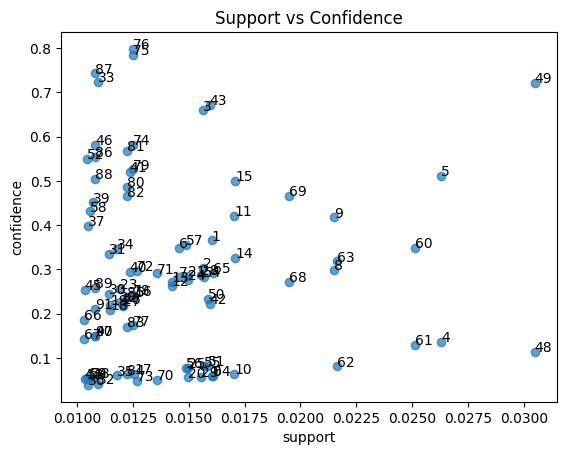

In [31]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
for i in range(rules.shape[0]):
    plt.text(rules.loc[i,"support"], rules.loc[i,"confidence"], str(i))
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [32]:
# group the data by 'Suspect Product Names' and count the number of occurrences
count_df = new_df.groupby('drugname').size().reset_index(name='Count')

# sort the data by 'Count' in descending order
sorted_df = count_df.sort_values(by='Count', ascending=False)

# print the top 10 results
print(sorted_df.head(10))

         drugname  Count
25    MONTELUKAST  42999
35     PREDNISONE  32313
34   PREDNISOLONE  10143
43  TRIAMCINOLONE   8851
10  DEXAMETHASONE   8031
41   THEOPHYLLINE   6899
12    FLUTICASONE   6467
18    IPRATROPIUM   5698
0       ALBUTEROL   5563
42     TIOTROPIUM   5215


In [33]:
# filter rows where 'drugname' is 'MONTELUKAST'
namesearch_df = new_df[new_df['drugname'] == 'PREDNISONE']

# print the results
print(namesearch_df)


        primaryid   caseid  caseversion i_f_code    event_dt      mfr_dt  \
112     642916618  6429166           18        F    200604.0  20130321.0   
113     642916618  6429166           18        F    200604.0  20130321.0   
114     642916618  6429166           18        F    200604.0  20130321.0   
115     642916618  6429166           18        F    200604.0  20130321.0   
116     642916618  6429166           18        F    200604.0  20130321.0   
...           ...      ...          ...      ...         ...         ...   
388823   74971963  7497196            3        F  20090101.0  20101018.0   
388824   74971963  7497196            3        F  20090101.0  20101018.0   
388825   74971963  7497196            3        F  20090101.0  20101018.0   
388826   74971963  7497196            3        F  20090101.0  20101018.0   
388827   74971963  7497196            3        F  20090101.0  20101018.0   

        init_fda_dt    fda_dt rept_cod  \
112        20070927  20130328      EXP   
113

In [34]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [35]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/azureuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords


In [38]:
# filter rows where 'Suspect Product Names' is 'Symbicort'
drugname_df = new_df[new_df['drugname'] == 'PREDNISONE']

# extract words from 'Reactions' column and tokenize them
reactions = drugname_df['pt'].str.lower().str.cat(sep=' ')
tokens = word_tokenize(reactions)

# remove stop words and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# calculate word frequency distribution
fdist = FreqDist(tokens)

# print the top 10 most frequent words
print(fdist.most_common(10))

[('pain', 2867), ('site', 2342), ('injection', 2290), ('drug', 1379), ('infection', 961), ('decreased', 828), ('increased', 795), ('swelling', 641), ('ineffective', 634), ('blood', 585)]


In [39]:
tokenizer = RegexpTokenizer(r'\w+')
drugname_df['tokens'] = drugname_df['pt'].apply(lambda x: tokenizer.tokenize(x.lower()))


/tmp/ipykernel_61590/2864901946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['tokens'] = drugname_df['pt'].apply(lambda x: tokenizer.tokenize(x.lower()))


In [40]:
stop_words = set(stopwords.words('english'))
drugname_df['tokens'] = drugname_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


/tmp/ipykernel_61590/2917538086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['tokens'] = drugname_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


In [41]:
fdist = FreqDist([word for tokens in drugname_df['tokens'] for word in tokens])
sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)


In [42]:
for word, frequency in sorted_words[:10]:
    print(f"{word}: {frequency}")

    

pain: 2867
site: 2342
injection: 2290
drug: 1388
infection: 961
decreased: 828
increased: 795
swelling: 641
ineffective: 634
blood: 585


In [43]:
for index, row in drugname_df.iterrows():
    fdist = FreqDist(row['tokens'])
    sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)
    print(f"Row {index}:")
    for word, frequency in sorted_words[:10]:
        print(f"{word}: {frequency}")


Row 112:
adverse: 1
drug: 1
reaction: 1
Row 113:
asthma: 1
Row 114:
burning: 1
sensation: 1
Row 115:
cough: 1
Row 116:
drug: 1
effect: 1
incomplete: 1
Row 117:
drug: 1
ineffective: 1
Row 118:
drug: 1
intolerance: 1
Row 119:
dyspnoea: 1
Row 120:
exercise: 1
tolerance: 1
decreased: 1
Row 121:
incorrect: 1
dose: 1
administered: 1
Row 122:
inflammation: 1
Row 123:
lung: 1
disorder: 1
Row 124:
oral: 1
fungal: 1
infection: 1
Row 125:
oral: 1
pain: 1
Row 126:
oropharyngeal: 1
pain: 1
Row 127:
painful: 1
respiration: 1
Row 128:
pneumonia: 1
Row 129:
product: 1
quality: 1
issue: 1
Row 130:
pulmonary: 1
congestion: 1
Row 131:
pulmonary: 1
function: 1
test: 1
decreased: 1
Row 132:
respiratory: 1
tract: 1
irritation: 1
Row 133:
wheezing: 1
Row 235:
atrophy: 1
Row 236:
deep: 1
vein: 1
thrombosis: 1
Row 237:
haemoglobin: 1
decreased: 1
Row 238:
plasmacytoma: 1
Row 239:
tendon: 1
rupture: 1
Row 240:
alopecia: 1
Row 241:
arthritis: 1
Row 242:
ataxia: 1
Row 243:
balance: 1
disorder: 1
Row 244:
breast: 

In [44]:
# create a new column to store the tokenized reactions
drugname_df['Reactions_Tokenized'] = drugname_df['pt'].str.lower().str.split('[,;]')

# initialize a dictionary to store the word frequencies
word_freq = {}

# loop through each row of the dataframe
for row in drugname_df.itertuples():
    # loop through each tokenized word in the row
    for word in row.Reactions_Tokenized:
        # ignore stop words and single character words
        if word not in set(stopwords.words('english')) and len(word) > 1:
            # increment the word frequency count in the dictionary
            word_freq[word] = word_freq.get(word, 0) + 1

# sort the dictionary by the word frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
for word, freq in sorted_word_freq[:1000]:
    print(f'{word}: {freq}')


/tmp/ipykernel_61590/888490968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugname_df['Reactions_Tokenized'] = drugname_df['pt'].str.lower().str.split('[,;]')


injection site pain: 879
drug ineffective: 623
arthralgia: 492
fatigue: 464
pain: 463
headache: 449
nausea: 432
diarrhoea: 391
pyrexia: 366
injection site bruising: 315
pain in extremity: 301
dyspnoea: 292
abdominal pain: 263
vomiting: 249
pneumonia: 239
off label use: 237
injection site erythema: 225
cough: 222
nasopharyngitis: 213
crohn's disease: 211
injection site haemorrhage: 209
dizziness: 208
incorrect dose administered: 207
rash: 200
rheumatoid arthritis: 193
malaise: 190
asthenia: 180
joint swelling: 178
local swelling: 172
device malfunction: 169
back pain: 166
febrile neutropenia: 158
weight decreased: 153
injection site pruritus: 148
sinusitis: 146
fall: 142
pruritus: 139
weight increased: 139
chest pain: 138
insomnia: 131
drug dose omission: 130
anaemia: 124
urinary tract infection: 124
abdominal pain upper: 122
hypoaesthesia: 122
oropharyngeal pain: 120
wrong technique in drug usage process: 120
muscle spasms: 120
paraesthesia: 117
hypertension: 111
erythema: 111
infectio

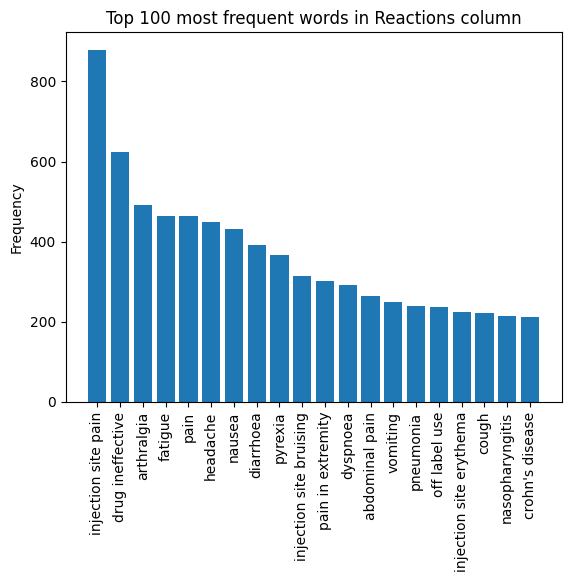

In [45]:
import matplotlib.pyplot as plt
from collections import Counter

# create a list of words from the 'Reactions' column
reactions = drugname_df['pt'].str.lower().str.cat(sep=',')

# split the reactions by comma and semi-colon
words = reactions.split(',') + [x.strip() for x in reactions.split(';')]

# count the frequency of each word
word_counts = Counter(words)

# create a list of the top 100 words and their counts
top_words = word_counts.most_common(20)

# create a bar chart
plt.bar([x[0] for x in top_words], [x[1] for x in top_words])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Top 100 most frequent words in Reactions column')
plt.show()
